Pre-processing 


In [2]:
import pandas as pd

df = pd.read_csv("/workspaces/projectsummer/project csv.csv", header = None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,NaN,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30,...,2017-03-31,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31,2014-12-31
1,报告期,三季报,中报,一季报,年报,三季报,中报,一季报,年报,三季报,...,一季报,年报,三季报,中报,一季报,年报,三季报,中报,一季报,年报
2,报表类型,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,...,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表,合并报表
3,营业收入,"7,198,300","4,680,100","2,130,100","9,677,300","7,160,600","4,825,600","2,332,900","8,146,200","5,714,400",...,"269,627","700,013","471,550","241,707","114,705","404,603","283,165","189,486","93,988","319,836"
4,产品,"7,198,300","4,680,100","2,130,100","9,677,300","7,160,600","4,825,600","2,332,900","8,146,200","5,714,400",...,"269,627","700,013","471,550","241,707","114,705","404,603","283,165","189,486","93,988","319,836"


In [3]:
df.info

<bound method DataFrame.info of                          0           1           2           3           4   \
0                       NaN  2024-09-30  2024-06-30  2024-03-31  2023-12-31   
1                       报告期         三季报          中报         一季报          年报   
2                      报表类型        合并报表        合并报表        合并报表        合并报表   
3                      营业收入   7,198,300   4,680,100   2,130,100   9,677,300   
4                        产品   7,198,300   4,680,100   2,130,100   9,677,300   
..                      ...         ...         ...         ...         ...   
61                     其他地区         NaN         NaN         NaN         NaN   
62              2014年之前地区分类         NaN         NaN         NaN         NaN   
63                      NaN         NaN         NaN         NaN         NaN   
64                      NaN         NaN         NaN         NaN         NaN   
65                      NaN         NaN         NaN         NaN         NaN   

            5      

In [4]:
null_count = df.isna().count()
null_count

0     66
1     66
2     66
3     66
4     66
5     66
6     66
7     66
8     66
9     66
10    66
11    66
12    66
13    66
14    66
15    66
16    66
17    66
18    66
19    66
20    66
21    66
22    66
23    66
24    66
25    66
26    66
27    66
28    66
29    66
30    66
31    66
32    66
33    66
34    66
35    66
36    66
37    66
38    66
39    66
40    66
dtype: int64

In [5]:
#  用第0行作为真正的列名，第1行第2行为说明，剩下为数据
new_columns = df.iloc[0].tolist()
df_clean = df.iloc[3:].copy()
df_clean.columns = new_columns


In [6]:
#  设置第一列为指标列
first_column = df_clean.columns[0]
df_clean = df_clean.set_index(first_column)



In [7]:
#  处理列名为空格和转换为日期
df_clean.columns = [str(col).strip() for col in df_clean.columns]
date_columns = pd.to_datetime(df_clean.columns, errors='coerce')

In [8]:
#  保留有效日期列
valid_date_mask = ~date_columns.isna()
df_clean = df_clean.loc[:, valid_date_mask]
df_clean.columns = date_columns[valid_date_mask]


In [9]:

#  转置
df_transposed = df_clean.T

#  转换数值格式
def to_float(val):
    try:
        return float(str(val).replace(",", ""))
    except:
        return pd.NA

df_transposed = df_transposed.applymap(to_float)

#  删除空列 & 保留非空值 ≥ 25 的指标
df_cleaned = df_transposed.dropna(axis=1, how='all')
df_final = df_cleaned.loc[:, df_cleaned.notna().sum() >= 25]

# 9. 输出确认
print("数据修复完成，预览如下：")
print(df_final.head())
print("数据结构：")
print(df_final.info())

数据修复完成，预览如下：
nan              营业收入         产品          汽车销售          汽车租赁          汽车监管信贷  \
2024-09-30  7198300.0  7198300.0     5382100.0      138000.0        207100.0   
2024-06-30  4680100.0  4680100.0     3499000.0       93400.0        133200.0   
2024-03-31  2130100.0  2130100.0     1646000.0       47600.0         44200.0   
2023-12-31  9677300.0  9677300.0     7850900.0      212000.0        179000.0   
2023-09-30  7160600.0  7160600.0     5787900.0      162000.0        135700.0   

nan                 储能          服务及其他收入         地区          美国          中国大陆  \
2024-09-30    702500.0         768600.0  7198300.0   3560200.0     1489300.0   
2024-06-30    464900.0         489600.0  4680100.0   2301800.0      922800.0   
2024-03-31    163500.0         228800.0  2130100.0    976200.0      459200.0   
2023-12-31    603500.0         831900.0  9677300.0   4523500.0     2174500.0   
2023-09-30    459700.0         615300.0  7160600.0   3347200.0     1564200.0   

nan         ...         毛

/tmp/ipykernel_1156/3496734071.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_transposed = df_transposed.applymap(to_float)


In [10]:
df_final.head()

nan,营业收入,产品,汽车销售,汽车租赁,汽车监管信贷,储能,服务及其他收入,地区,美国,中国大陆,...,毛利,产品,汽车销售,汽车租赁,储能,毛利率(%),产品,汽车销售,汽车租赁,储能
2024-09-30,7198300.0,7198300.0,5382100.0,138000.0,207100.0,702500.0,768600.0,7198300.0,3560200.0,1489300.0,...,1327100.0,1327100.0,821900.0,61900.0,186800.0,18.44,18.44,15.27,44.86,26.59
2024-06-30,4680100.0,4680100.0,3499000.0,93400.0,133200.0,464900.0,489600.0,4680100.0,2301800.0,922800.0,...,827400.0,827400.0,513100.0,42000.0,114300.0,17.68,17.68,14.66,44.97,24.59
2024-03-31,2130100.0,2130100.0,1646000.0,47600.0,44200.0,163500.0,228800.0,2130100.0,976200.0,459200.0,...,369600.0,369600.0,256300.0,20700.0,40300.0,17.35,17.35,15.57,43.49,24.65
2023-12-31,9677300.0,9677300.0,7850900.0,212000.0,179000.0,603500.0,831900.0,9677300.0,4523500.0,2174500.0,...,1766000.0,1766000.0,1338800.0,85200.0,114100.0,18.25,18.25,17.05,40.19,18.91
2023-09-30,7160600.0,7160600.0,5787900.0,162000.0,135700.0,459700.0,615300.0,7160600.0,3347200.0,1564200.0,...,1322200.0,1322200.0,996000.0,64800.0,82700.0,18.46,18.46,17.21,40.00,17.99


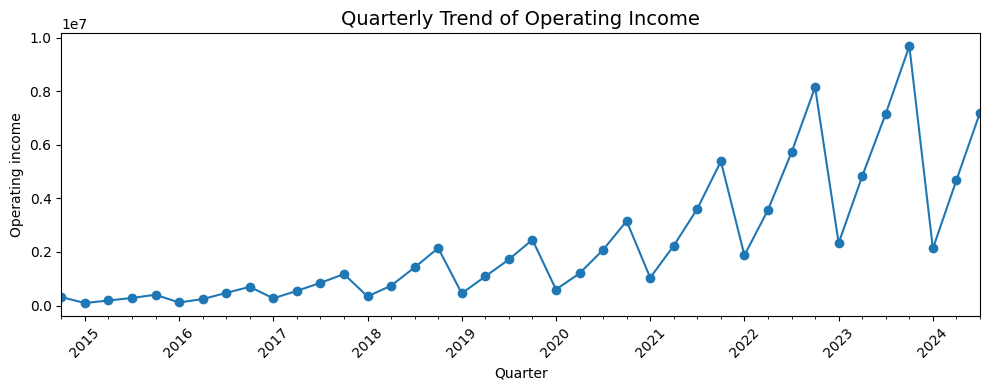

In [11]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
col_revenue = [col for col in df_final.columns if col.strip() == '营业收入'][0]

plt.figure(figsize=(10, 4))
df_final[col_revenue].plot(marker='o')
plt.title("Quarterly Trend of Operating Income", fontsize=14)
plt.ylabel("Operating income")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# 按“年”分组，在每年内做季度差分，避免跨年差分错误
df_sorted['季度实际值'] = df_sorted.groupby('Year')[revenue_column].diff()

# 对每年第一季度，用原始值填补（因为第一季度没有上一季度差分）
first_quarters = df_sorted['Quarter'] == 1
df_sorted.loc[first_quarters, '季度实际值'] = df_sorted.loc[first_quarters, revenue_column]

# 展示前几行结果验证
df_sorted[[revenue_column, '季度实际值']].head(12)


nan,营业收入,季度实际值
index,,
2014-12-31,319836.0,NaN
2015-03-31,93988.0,93988.0
2015-06-30,189486.0,95498.0
2015-09-30,283165.0,93679.0
2015-12-31,404603.0,121438.0
2016-03-31,114705.0,114705.0
2016-06-30,241707.0,127002.0
2016-09-30,471550.0,229843.0
2016-12-31,700013.0,228463.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

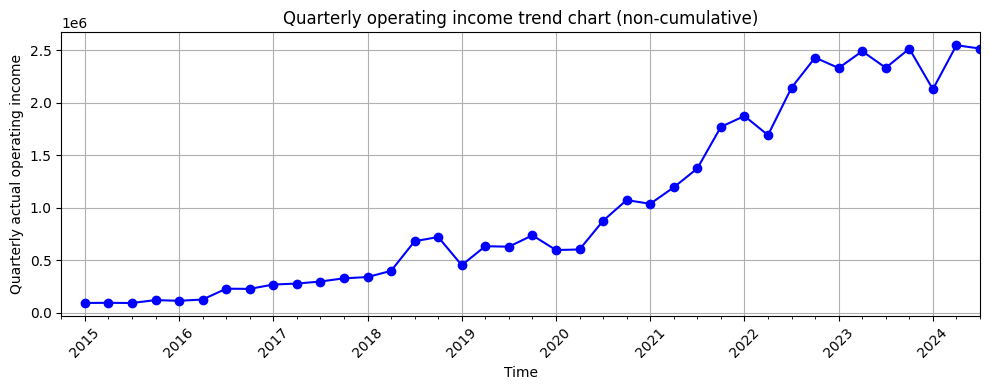

In [22]:
import matplotlib.pyplot as plt

# 设置中文显示（如无字体会忽略）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘图
plt.figure(figsize=(10, 4))
df_sorted['季度实际值'].plot(marker='o', color='blue')
plt.title("Quarterly operating income trend chart (non-cumulative)")
plt.xlabel("Time")
plt.ylabel("Quarterly actual operating income")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missi

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3

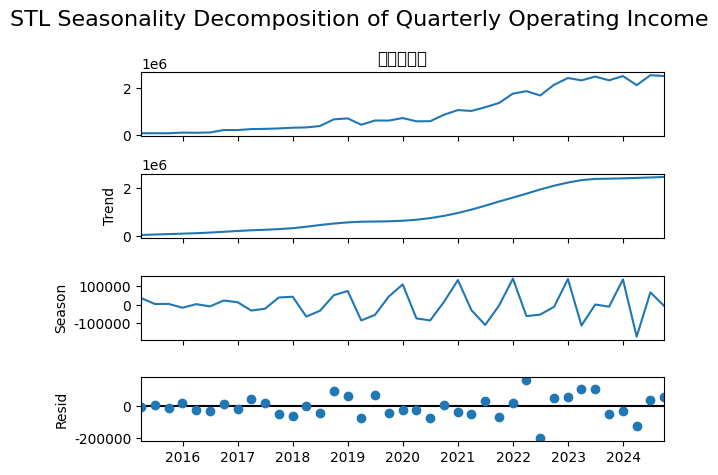

In [24]:
from statsmodels.tsa.seasonal import STL

# 构造时间序列（去除累加的季度实际收入，确保无缺失值）
quarterly_series = df_sorted['季度实际值'].dropna()

# 进行 STL 分解（周期设为4，表示每年四个季度）
stl = STL(quarterly_series, period=4)
stl_result = stl.fit()

# 绘图
stl_result.plot()
plt.suptitle("STL Seasonality Decomposition of Quarterly Operating Income", fontsize=16)
plt.tight_layout()
plt.show()


In [33]:
# 创建一个透视表（年 × 季度）的格式：用于训练/测试集展示
df_growth_matrix = growth_rate.copy().to_frame(name='growth_rate')
df_growth_matrix['Year'] = df_growth_matrix.index.year
df_growth_matrix['Quarter'] = df_growth_matrix.index.quarter

# 透视为年 × Qtr1~Qtr4
pivot_growth = df_growth_matrix.pivot(index='Year', columns='Quarter', values='growth_rate')

# 分离训练集（~2023）和测试集（2024前三季度）
train_matrix = pivot_growth.loc[2015:2023]
test_matrix = pivot_growth.loc[[2024], [1, 2, 3]]

print(" 训练集（2015-2023）增长率矩阵：")
print(train_matrix)

print(" 测试集（2024 Q1-Q3）：")
print(test_matrix)
test_matrix


 训练集（2015-2023）增长率矩阵：
Quarter         1         2         3         4
Year                                           
2015          NaN  0.016066 -0.019048  0.296320
2016    -0.055444  0.107205  0.809759 -0.006004
2017     0.180178  0.034600  0.069943  0.101713
2018     0.036646  0.174105  0.705154  0.058826
2019    -0.371500  0.398158 -0.007374  0.171532
2020    -0.189464  0.008521  0.453115  0.224946
2021    -0.033042  0.151025  0.150443  0.287999
2022     0.058525 -0.097142  0.266919  0.133495
2023    -0.040669  0.068498 -0.063265  0.077816
 测试集（2024 Q1-Q3）：
Quarter         1         2         3
Year                                 
2024    -0.153614  0.197127 -0.012471


Quarter,1,2,3
Year,,,
2024,-0.153614,0.197127,-0.012471


In [51]:
# 重新训练 AutoReg 模型并预测，以确保变量存在
from statsmodels.tsa.ar_model import AutoReg

# 用滞后4构建 AR 模型
model = AutoReg(train, lags=4, old_names=False)
model_fit = model.fit()

# 生成测试集预测值
preds = model_fit.predict(start=test.index[0], end=test.index[-1])

# 再次计算误差指标
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, preds)
rmse = np.sqrt(mean_squared_error(test, preds))

print("Predictions:", preds)
print("Test data:", test)
print("MAE:", mae)
print("RMSE:", rmse)

Predictions: 2024-03-31    0.261046
2024-06-30    0.146885
2024-09-30    0.103953
Freq: QE-DEC, dtype: float64
Test data: index
2024-03-31   -0.153614
2024-06-30    0.197127
2024-09-30   -0.012471
Name: 季度实际值, dtype: float64
MAE: 0.19377498575082042
RMSE: 0.2503473956679072


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

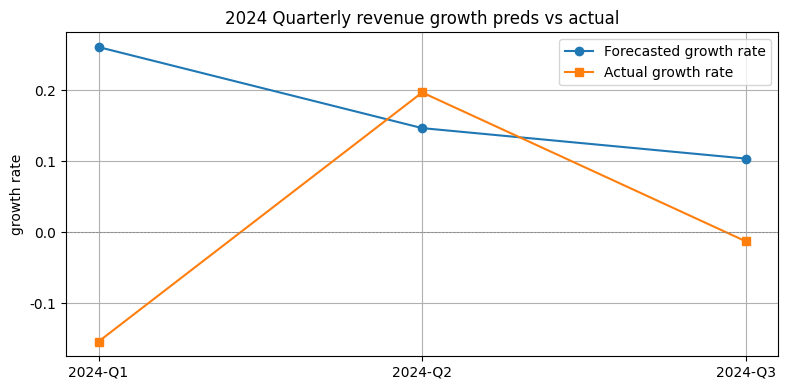

In [43]:
import matplotlib.pyplot as plt

# 创建预测值与实际值序列
pred_values = [0.2610, 0.1469, 0.1040]
actual_values = [-0.1536, 0.1971, -0.0125]
quarters = ['2024-Q1', '2024-Q2', '2024-Q3']

# 绘制折线图比较预测与实际
plt.figure(figsize=(8, 4))
plt.plot(quarters, pred_values, marker='o', label='Forecasted growth rate')
plt.plot(quarters, actual_values, marker='s', label='Actual growth rate')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("2024 Quarterly revenue growth preds vs actual")
plt.ylabel("growth rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 57.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 38.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_xgb = df_sorted[['Year', 'Quarter', '季度实际值']].dropna()
df_xgb['lag_1'] = df_xgb['季度实际值'].shift(1)
df_xgb['lag_2'] = df_xgb['季度实际值'].shift(2)
df_xgb['lag_3'] = df_xgb['季度实际值'].shift(3)
df_xgb_model = df_xgb.dropna()

X = df_xgb_model[['Year', 'Quarter', 'lag_1', 'lag_2', 'lag_3']]
y = df_xgb_model['季度实际值']


X_train = X[X.index.year < 2024]
y_train = y[X.index.year < 2024]
X_test = X[(X.index.year == 2024) & (X.index.quarter <= 3)]
y_test = y[(y.index.year == 2024) & (y.index.quarter <= 3)]

# 训练并预测
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)

# 将 XGBoost 的营业收入预测转换为“季度增长率”
previous_quarter_value = df_sorted.loc[(df_sorted['Year'] == 2023) & (df_sorted['Quarter'] == 4), '季度实际值'].values[0]
xgb_growth_preds = []
for pred in preds_xgb:
    growth = (pred - previous_quarter_value) / previous_quarter_value
    xgb_growth_preds.append(growth)
    previous_quarter_value = pred

# 获取真实增长率
quarterly_series = df_sorted['季度实际值'].dropna()
growth_rate = quarterly_series.pct_change().dropna()
test = growth_rate[(growth_rate.index.year == 2024) & (growth_rate.index.quarter <= 3)]

# 误差评估
mae_growth = mean_absolute_error(test, xgb_growth_preds)
rmse_growth = np.sqrt(mean_squared_error(test, xgb_growth_preds))

print("Predictions:", xgb_growth_preds)
print("Test Values:", test.values.tolist())
print("MAE (Growth):", mae_growth)
print("RMSE (Growth):", rmse_growth)



Predictions: [np.float64(-0.07403295982834665), np.float32(-0.026705073), np.float32(0.029394684)]
Test Values: [-0.15361385941908057, 0.19712689545091777, -0.012470588235294122]
MAE (Growth): 0.11509271360969757
RMSE (Growth): 0.13926781252438966


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

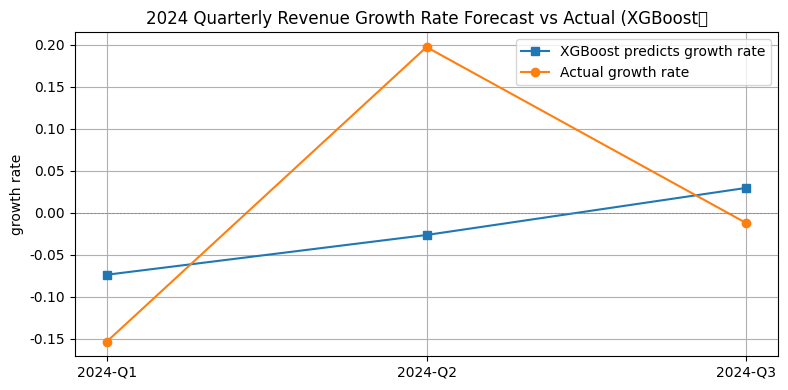

In [62]:
quarters = ['2024-Q1', '2024-Q2', '2024-Q3']
actual_growth = test.values.tolist()
xgb_growth = xgb_growth_preds

plt.figure(figsize=(8, 4))
plt.plot(quarters, xgb_growth, marker='s', label='XGBoost predicts growth rate')
plt.plot(quarters, actual_growth, marker='o', label='Actual growth rate')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("2024 Quarterly Revenue Growth Rate Forecast vs Actual (XGBoost）")
plt.ylabel("growth rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

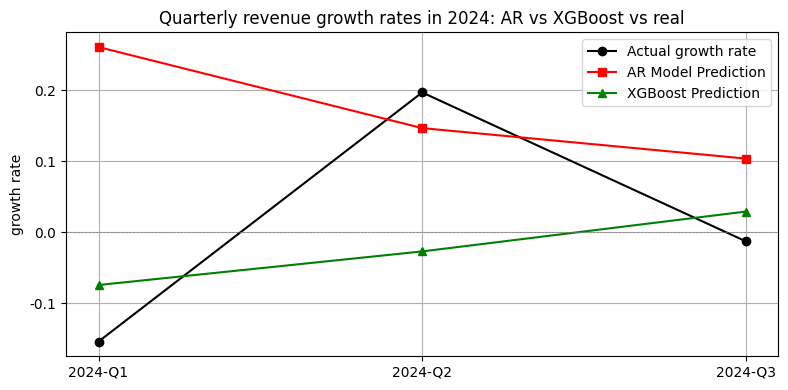

In [65]:
# 准备对比图数据
quarters = ['2024-Q1', '2024-Q2', '2024-Q3']

# AR 模型预测增长率（已知）
ar_preds = [0.2610, 0.1469, 0.1040]

# XGBoost 模型预测增长率
xgb_preds = [-0.0740, -0.0267, 0.0294]

# 实际增长率
actual_values = [-0.1536, 0.1971, -0.0125]

# 绘图
plt.figure(figsize=(8, 4))
plt.plot(quarters, actual_values, marker='o', label='Actual growth rate', color='black')
plt.plot(quarters, ar_preds, marker='s', label='AR Model Prediction', color='red')
plt.plot(quarters, xgb_preds, marker='^', label='XGBoost Prediction', color='green')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Quarterly revenue growth rates in 2024: AR vs XGBoost vs real")
plt.ylabel("growth rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
